# Building RNN with Pytorch

Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:
1. Sur un problème linéaire, nous allons utiliser les torch optimizers pour trouver le paramètre de régression idéal
2. Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
3. Sur un problème de texte, nous allons construire un modèle RNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.is_available()

True

## Optimizers

### Données example
Nous allons construire des données $y = \beta^* X + b$


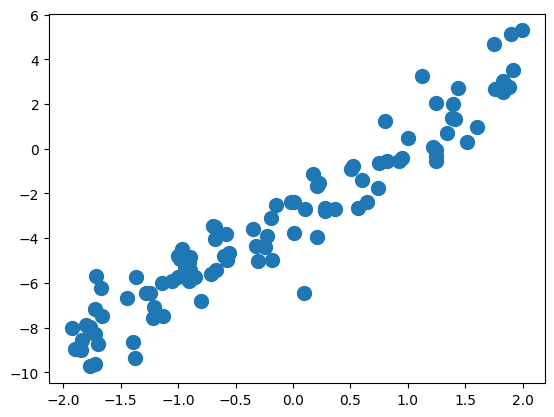

In [2]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [3]:
beta = torch.nn.Parameter(torch.tensor(0.))
alpha = torch.nn.Parameter(torch.tensor(0.))
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam([alpha, beta], lr=0.1)
for epoch in range(n):
    optimizer.zero_grad()
    y_pred = alpha + beta * x
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    

In [4]:
#beta = beta.detach().numpy()
#beta = beta[0]
print(type(beta), type(x))
print(x)

<class 'torch.nn.parameter.Parameter'> <class 'torch.Tensor'>
tensor([[-0.9024],
        [-0.9989],
        [-1.0573],
        [-1.7759],
        [ 0.5663],
        [-0.5802],
        [ 1.1207],
        [-1.7643],
        [-0.6819],
        [ 1.2477],
        [ 1.9989],
        [-1.8406],
        [ 0.0091],
        [ 1.2444],
        [-1.9023],
        [ 0.6462],
        [ 1.6015],
        [ 0.6007],
        [ 1.3396],
        [ 0.7975],
        [ 0.0105],
        [-0.7178],
        [ 1.3887],
        [-0.5754],
        [ 1.4137],
        [ 1.7555],
        [-0.6785],
        [ 1.8315],
        [ 0.0979],
        [-1.7643],
        [-1.3966],
        [-1.7208],
        [-0.8956],
        [-0.8497],
        [ 0.5082],
        [ 1.3915],
        [-1.4493],
        [-0.9659],
        [-0.2457],
        [ 1.8254],
        [-0.3505],
        [-1.3758],
        [-1.1382],
        [ 0.9246],
        [-0.1940],
        [-0.8045],
        [-0.5965],
        [-0.9375],
        [-1.6597],
       

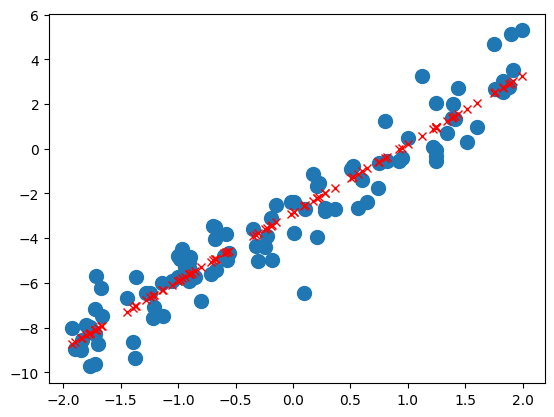

In [5]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, (alpha + beta * x).detach().numpy(), 'rx')

## Construire un multi-layer perceptron (MLP)

Ici, les données sont $y = a x^2 + b$

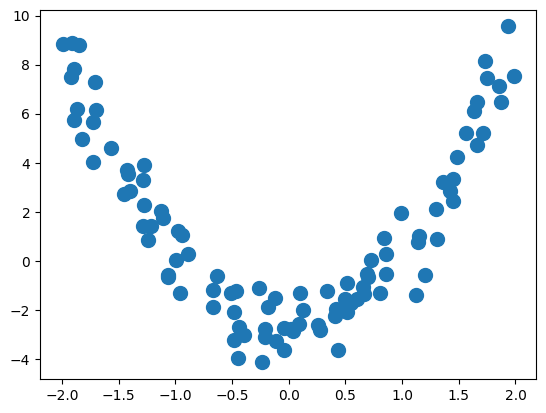

In [6]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [7]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, X):
        X = self.relu(self.layer1(X))
        X = self.relu(self.layer2(X))
        X = self.output_layer(X)
        return X



En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [8]:
# Initialisation du modèle de perceptron multicouche (Multi-Layer Perceptron, MLP)
dimension_entree = 1  # La dimension de l'entrée x est unidimensionnelle
taille_couche_cachee = 10  # Nombre de neurones dans la couche cachée
model = MLP(dimension_entree, taille_couche_cachee)

# Configuration de la fonction de perte et de l'optimiseur
fonction_perte = torch.nn.MSELoss(reduction='mean')  # Utilisation de l'erreur quadratique moyenne
optimiseur = torch.optim.Adam(model.parameters(), lr=0.01)  # Optimiseur Adam avec un taux d'apprentissage de 0.01

# Boucle d'entraînement
nombre_epochs = 1000  # Nombre total de passages dans l'ensemble de données d'entraînement
for epoch in range(nombre_epochs):
    # Génération des prédictions du modèle pour l'ensemble d'entrées xvec
    predictions = model(xvec)

    # Calcul de la perte en comparant les prédictions aux valeurs réelles y
    perte = fonction_perte(predictions, torch.tensor(y, dtype=torch.float32))

    # Réinitialisation des gradients avant le calcul de la rétropropagation
    optimiseur.zero_grad()

    # Calcul des gradients via rétropropagation
    perte.backward()

    # Mise à jour des poids et des biais du modèle selon les gradients calculés
    optimiseur.step()

    # Affichage de la valeur de la perte tous les 100 epochs pour suivre la progression
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: perte = {perte.item()}')


Epoch 0: perte = 15.436359405517578
Epoch 100: perte = 1.1799570322036743
Epoch 200: perte = 0.9991470575332642
Epoch 300: perte = 0.8861010074615479
Epoch 400: perte = 0.8579540848731995
Epoch 500: perte = 0.8439995050430298
Epoch 600: perte = 0.8325071930885315
Epoch 700: perte = 0.8269412517547607
Epoch 800: perte = 0.8229487538337708
Epoch 900: perte = 0.8208900690078735


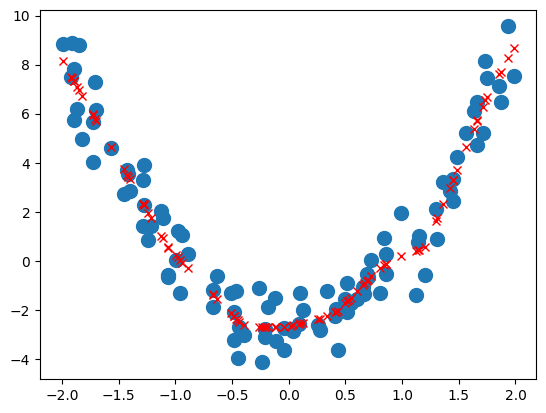

In [9]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
predict = model(xvec).detach().numpy()
plt.plot(x, predict, 'rx')

## Construire un Recurrent Neural Network (RNN) from scratch

### Données
 
Téléchargez [ici](https://download.pytorch.org/tutorial/data.zip) un jeu de données "nom" -> pays d'origine du nom.
Les noms de chaque pays sont dans leur fichier texte "[country].txt"

A partir de ces données, créez X la liste des noms et y le pays d'origine de chaque nom

### Aide pour générer les données

A la fin de ce code, on lit les noms et leur pays d'origine.<br>
On a une fonction randomTrainingExample, qui génère le pays d'origine et le nom (en texte), puis l'ID de ce pays et le tenseur représetant le nom. <br>

A partir de là, vous pouvez générer les données X, y comme vous voulez

In [10]:

# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("../data/names/")

In [11]:
def read_names(path):
    category_lines = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue
            
        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]
        
        category = file.stem
        category_lines[category] = names

    return category_lines

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [12]:
category_lines = read_names(path)
all_categories = list(category_lines.keys())
n_categories = len(all_categories)

In [13]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [14]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Czech / line = Schenk
category = Irish / line = Tighearnach
category = Polish / line = Jaskulski
category = Arabic / line = Amari
category = English / line = Newlands
category = Italian / line = De laurentis
category = Italian / line = Guerra
category = Czech / line = Krivolavy
category = Spanish / line = Rios
category = Greek / line = Lolos


### Construire le RNN

Un Recurrent Neural Network prend, pour prédire un input X et un hidden state H.<br>
Il output une prédiction et un nouvel hidden state pour la prochaine étape.<br>
Nous allons construire un modèle:

$f(name, H_0) = (proba(\mbox{name from country 0}), proba(\mbox{name from country 1}), \dots)$

Avec $H_0$ un hidden state initial (qui sera appris).

Pour l'instant, nous allons construire un RNN linéaire.<br>
Comme pour le MLP, construisez un torch.nn.Module:
- A l'init, la classe prendra les arguments input_size, hidden_state_dim, output_size
- L'init déclare un paramètre pour l'hidden state initial $H_0$, une layer linéaire prenant (input, hidden_state) -> output_size
- Le forward fonctionnera ainsi:
    - hidden_state = $H_0$
    - For letter in name:
        - x = one-hot encode (letter)
        - output, hidden_state = linear_layer(x, hidden_state)
    - return softmax(output)


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Exemple de valeurs pour input_size et hidden_size
input_size = n_letters  # 'n_letters' est le nombre total de lettres uniques dans votre jeu de données
hidden_size = 128  # Vous pouvez choisir cette valeur; elle représente un hyperparamètre

# Définition de la classe LinearRNN qui hérite de nn.Module
class LinearRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=18):
        super(LinearRNN, self).__init__()
        self.hidden_size = hidden_size
        # Paramètre h0 initialisé à un vecteur de zéros pour l'état caché initial
        self.h0 = nn.Parameter(torch.zeros(1, hidden_size))
        # Couche linéaire combinant l'entrée et l'état caché pour produire un nouvel état caché
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        # Couche linéaire combinant l'entrée et l'état caché pour produire la sortie
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

    def forward(self, name):
        # Initialisation de l'état caché avec h0
        hidden = self.h0
        # Passage séquentiel de chaque lettre (supposée encodée) à travers le RNN
        for i in range(name.size()[0]):
            # Combinaison de la lettre actuelle et de l'état caché précédent
            combined = torch.cat((name[i], hidden), 1)
            # Mise à jour de l'état caché
            hidden = self.i2h(combined)
            # Calcul de la sortie
            output = self.i2o(combined)
        # Application de la fonction log_softmax sur la sortie pour obtenir des probabilités log
        return F.log_softmax(output, dim=1)

# Exemple d'initialisation du modèle avec la classe LinearRNN
model = LinearRNN(input_size, hidden_size)


A l'aide de la negative log likelihood (torch.nn.NLLLoss), construisez une boucle optimisant ce modèle (optimizer, itération au sein des examples).

**Attention 1:** Ici, on n'a pas des tenseurs X, y. On va prendre les exemples 1 par 1.<br>
**Attention 2:** Si le modèle apprend les examples dans l'ordre (d'abord tous les noms arabes, puis tous les chinois, puis tous les tchèques, etc), cela changera grandement le résulat (et le modèle sera très mauvais)

In [16]:
import torch.optim as optim
import random
import glob
import os

# Chemin vers les fichiers de données
chemin_fichiers_donnees = glob.glob('../data/names/*.txt')

# Dictionnaire pour stocker les noms par nationalité
noms_par_nationalite = {}

# Chargement des noms depuis les fichiers
for fichier in chemin_fichiers_donnees:
    nationalite = os.path.basename(fichier).split('.')[0]
    with open(fichier, 'r', encoding='utf-8') as f:
        noms = f.read().strip().split('\n')
        noms_par_nationalite[nationalite] = [unicodeToAscii(nom) for nom in noms]

# Affichage du nombre de noms par nationalité pour les premières entrées
{cle: len(noms_par_nationalite[cle]) for cle in list(noms_par_nationalite)[:5]}

# Compilation des données d'entraînement sous forme de liste de tuples (nom, nationalité)
donnees_entrainement = []
for nationalite, noms in noms_par_nationalite.items():
    donnees_entrainement.extend([(nom, nationalite) for nom in noms])

# Affichage de la taille des données d'entraînement et des premiers exemples
len(donnees_entrainement), donnees_entrainement[:5]

# Initialisation du modèle RNN, de la fonction de perte et de l'optimiseur
model = LinearRNN(input_size, hidden_size)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
nombre_epochs = 10  # Nombre d'époques ajustable selon le besoin

# Entraînement du modèle
for epoch in range(nombre_epochs):
    perte_totale = 0
    random.shuffle(donnees_entrainement)  # Mélange des données d'entraînement

    for nom, pays in donnees_entrainement:
        nom_tensor = lineToTensor(nom)  # Conversion du nom en tensor
        pays_tensor = torch.tensor([all_categories.index(pays)], dtype=torch.long)

        optimizer.zero_grad()

        sortie = model(nom_tensor)

        perte = criterion(sortie, pays_tensor)
        perte.backward()
        optimizer.step()

        perte_totale += perte.item()

    perte_moyenne = perte_totale / len(donnees_entrainement)
    print(f"Epoch {epoch} - Perte: {perte_moyenne:.4f}")


Epoch 0 - Perte: 1.3752
Epoch 1 - Perte: 1.0644
Epoch 2 - Perte: 0.9729
Epoch 3 - Perte: 0.9169
Epoch 4 - Perte: 0.8801
Epoch 5 - Perte: 0.8591
Epoch 6 - Perte: 0.8436
Epoch 7 - Perte: 0.8295
Epoch 8 - Perte: 0.8179
Epoch 9 - Perte: 0.8153


## Utilisez les RNNs de Pytorch

Sur le même jeu de données, nous allons utiliser les RNNs déjà codés par Pytorch.<br>

### Padding

Nous voulons aussi utiliser des tenseurs X et y pour utiliser data loader pour les batchs, etc


Avec du padding, créer un tenseur X de la taille (nb_data, name_max_length, vocab_size). <br>
X[i, j, :] contient le one-hot encode de la j-ème lettre du i-ème prénom. Si le i-ème prénom a moins de j lettre, alors X[i, j, :] est un vecteur nul

In [17]:
def convertNameToTensor(name, max_name_length):
    """
    Convert a given name to a 2D tensor representing a one-hot encoded matrix with padding.
    Each row in the tensor corresponds to one character of the name with one-hot encoding, 
    where `max_name_length` is the maximum length of any name in the dataset to ensure 
    uniform tensor size.
    
    Parameters:
    - name (str): The name to convert.
    - max_name_length (int): The length to pad or truncate the name to.
    
    Returns:
    - tensor (FloatTensor): A 2D tensor with shape (max_name_length, n_letters).
    """
    # Initialize a zero tensor with dimensions of [max_name_length x n_letters]
    tensor = torch.zeros(max_name_length, n_letters)
    # Iterate over each character in the name
    for index, letter in enumerate(name):
        # Set the corresponding position to 1 to represent the letter as one-hot
        tensor[index][all_letters.find(letter)] = 1
    return tensor

# Calculate the maximum length of a name from all the names in the dataset
max_name_length = max(len(name) for names in noms_par_nationalite.values() for name in names)

# Initialize tensors to hold the one-hot encoded names and the corresponding nationalities
names_tensor = torch.zeros(len(donnees_entrainement), max_name_length, n_letters)
nationalities_tensor = torch.zeros(len(donnees_entrainement), dtype=torch.long)

# Populate the tensors with one-hot encoded names and nationality indices
for index, (name, nationality) in enumerate(donnees_entrainement):
    names_tensor[index] = convertNameToTensor(name, max_name_length)
    nationalities_tensor[index] = all_categories.index(nationality)

# names_tensor and nationalities_tensor are now ready to be used with a DataLoader


### Modèle

Construisez un modèle qui:
- A l'init, déclare un hidden state initial $H_0$, un RNN (avec torch.nn.RNN)
- Au forward, passe (input, $H_0$) dans le RNN, puis applique un softmax à l'output

In [18]:

n_letters = 57
input_size = n_letters  # Taille de l'entrée correspondant à la taille du vecteur one-hot
hidden_size = 128  # Taille de l'état caché, vous pouvez ajuster cette valeur
output_size = len(all_categories)  


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        output, _ = self.rnn(input)
        output = self.out(output[:, -1])
        return F.log_softmax(output, dim=1)

    def initHidden(self):
        # Initialisation de l'état caché
        return torch.zeros(1, 1, self.hidden_size)


# Exemple d'initialisation du modèle
model = RNNModel(input_size, hidden_size, output_size)
print(model)

RNNModel(
  (rnn): RNN(57, 128)
  (out): Linear(in_features=128, out_features=18, bias=True)
)


Entraînez le modèle avec des batchs de X, y

In [19]:
from torch.utils.data import TensorDataset, DataLoader
print(len(names_tensor))
print(len(nationalities_tensor))
# Création d'un TensorDataset et d'un DataLoader
dataset = TensorDataset(names_tensor, nationalities_tensor)
batch_size = 64  # Vous pouvez ajuster la taille des batchs
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.005)

# Boucle d'entraînement
num_epochs =  10 # Vous pouvez ajuster le nombre d'époques
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        batch_X, batch_y = batch
        # batch_X = batch_X.transpose(0, 1)  # Transposition pour que la dimension des séquences soit la première

        optimizer.zero_grad()
        
        """
        hidden = model.initHidden()
        hidden = hidden.repeat(1, batch_size, 1)  # Adapter la taille de l'état caché au batch

        for i in range(batch_X.size(0)):
            # output, hidden = model(batch_X[i].unsqueeze(0), hidden)
            output, hidden = model(batch_X[i], hidden)

        """
        
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader)}')

20074
20074
Epoch 1/10, Loss: 2.192208069524947
Epoch 2/10, Loss: 1.8729213442012762
Epoch 3/10, Loss: 1.8622149832689079
Epoch 4/10, Loss: 1.8590369869948953
Epoch 5/10, Loss: 1.856329495739785
Epoch 6/10, Loss: 1.8542460457534546
Epoch 7/10, Loss: 1.855271200085901
Epoch 8/10, Loss: 1.8531580491430442
Epoch 9/10, Loss: 1.8531083047010337
Epoch 10/10, Loss: 1.8528646697663957


### Amélioration du modèle

Tenter d'améliorer le modèle:
- En utilisant plusieurs layers dans le RNN
- En utilisant LSTM à la place de RNN (une autre forme de recurrent neural network, plus avancé)

(regardez la doc)

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparamètres
input_size = 10  # Taille du vocabulaire
embedding_size = 64  # Taille de l'embedding
hidden_size = 128  # Taille de l'état caché
output_size = 2   # Nombre de classes
num_layers = 2  # Nombre de couches LSTM

# Création du modèle
model = LSTMModel(input_size, embedding_size, hidden_size, output_size, num_layers)

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Exemple de données d'entrée et d'étiquettes (à remplacer par vos données)
x_train = torch.randint(0, input_size, (100, 5))  # Données d'entrée
y_train = torch.randint(0, output_size, (100,))  # Étiquettes

# Entraînement du modèle
num_epochs = 10
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.6938
Epoch [2/10], Loss: 0.6903
Epoch [3/10], Loss: 0.6874
Epoch [4/10], Loss: 0.6843
Epoch [5/10], Loss: 0.6808
Epoch [6/10], Loss: 0.6764
Epoch [7/10], Loss: 0.6712
Epoch [8/10], Loss: 0.6651
Epoch [9/10], Loss: 0.6583
Epoch [10/10], Loss: 0.6511


### Embedding

On veut utiliser en embedding pour les lettres.
Le forward appliquerait l'embedding aux lettres, puis les layers RNN prendrait l'embedding comme input

Nous allons utiliser torch.nn.Embedding
**Attention**: Embedding ne prend pas les lettres one-hot encoded, mais leurs indices.
Par exemple, "abca", il lui faudrait le vecteur [0, 1, 2, 0]<br>
et non [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

**Expérimenter torch.nn.Embedding**<br>
Instantier "emb" une torch.nn.Embedding avec les bons paramètres (regardez la doc)
En construisant le bon tenseur X_emb,

```emb(X_emb)```

doit retourner un tenseur (qui n'a pas de sens car il n'a rien appris pour l'instant, mais les opérations se passent bien)

In [21]:
import torch
import torch.nn as nn

class RNNWithEmbedding(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, embedding_dim, num_layers=1, model_type='RNN'):
        super(RNNWithEmbedding, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Couche d'embedding
        self.embedding = nn.Embedding(input_size, embedding_dim)

        # RNN ou LSTM
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
        else:
            self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Appliquer l'embedding
        embedded = self.embedding(x)

        # Initialiser l'état caché
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate le RNN/LSTM
        if isinstance(self.rnn, nn.LSTM):
            out, _ = self.rnn(embedded, (h0, c0))
        else:
            out, _ = self.rnn(embedded, h0)

        # Décoder la sortie du temps final
        out = self.fc(out[:, -1, :])
        return out

# Exemple d'utilisation
# input_size = Nombre total de lettres uniques dans le jeu de données
# embedding_dim = Dimension de l'embedding (par exemple, 64)
# hidden_size = Taille de l'état caché
# output_size = Nombre de classes (par exemple, nombre de langues)
input_size = n_letters  # Taille de l'entrée correspondant à la taille du vecteur one-hot
hidden_size = 128  # Taille de l'état caché, vous pouvez ajuster cette valeur
output_size = len(all_categories)  
embedding_dim = 64
model = RNNWithEmbedding(input_size, hidden_size, output_size, embedding_dim, num_layers=2, model_type='LSTM')

Construisez un modèle RNN, où les lettres passent par l'embedding avant d'être envoyées dans les couches de RNN.
Construisez une loop d'apprentissage

Expérimentez plusieurs valeurs pour le nombre de couche, la taille d'embedding ou les tailles d'hidden state.<br>
Quel neg log likelihood obtenez-vous ?

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNNModel(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.RNN(embedding_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = 10  # Taille du vocabulaire (à ajuster)
embedding_size = 64  # Taille de l'embedding
hidden_size = 128  # Taille de l'état caché
output_size = 2   # Nombre de classes (à ajuster)
num_layers = 1  # Nombre de couches RNN

model = RNNModel(input_size, embedding_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train = torch.randint(0, input_size, (100, 5))  # Exemple de données d'entrée
y_train = torch.randint(0, output_size, (100,))  # Exemple d'étiquettes

num_epochs = 10
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.7074
Epoch [2/10], Loss: 0.6751
Epoch [3/10], Loss: 0.6520
Epoch [4/10], Loss: 0.6332
Epoch [5/10], Loss: 0.6159
Epoch [6/10], Loss: 0.5991
Epoch [7/10], Loss: 0.5826
Epoch [8/10], Loss: 0.5664
Epoch [9/10], Loss: 0.5504
Epoch [10/10], Loss: 0.5344
